<a href="https://colab.research.google.com/github/pazz09/ADA-Informes/blob/main/BELLMAN_FORD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1- **DESCRIPCIÓN DEL PROBLEMA**  :

Problema: Encontrar el camino más corto.

**Entrada**: 

Un grafo G = (V, E), donde V son los vértices y E los arcos.

**Salida:**

Bellman-Ford: Distancia más corta o una declaración, indicando ciclo negativo.

Dijkstra: Distancia más corta.







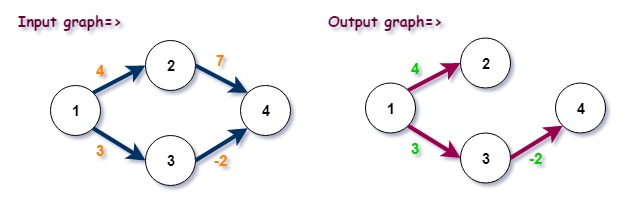




----------------------------------------------------------


2- **ALGORITMOS A UTILIZAR**:

**BELLMAN-FORD**

El algoritmo Bellman-Ford calcula las rutas más cortas de forma menor a mayor y detecta cuando hay ciclos negativos. Primero calcula las distancias más cortas que tienen como máximo un borde en el camino. Luego, calcula los caminos más cortos con 2 aristas como máximo, y así sucesivamente. Después de la i-ésima iteración del bucle exterior, se calculan los caminos más cortos con como máximo i aristas. 

Funcionamiento:

1. Se crea un arreglo de distancias con todos los valores.
2. Se calcula la distancia entre los nodos.
3. Si se detecta un ciclo negativo, se detiene el algortimo.
4. Si no, el algoritmo indica la distancia más corta.



**DIJKSTRA**

El algoritmo de Dijkstra resuelve el problema del camino más corto de una sola fuente si
todos los pesos de las aristas son mayores o iguales a cero.

Funcionamiento:

1. Marcar un nodo inicial con una distancia actual de 0 y el resto con infinito.
2. Establecer el nodo no visitado con la menor distancia actual como el nodo actual(A).
3. Para cada vecino V del nodo actual(A): sumar la distancia actual de A con el peso de la arista que conecta a A con V. Si el resultado es menor que la distancia actual de V, establecer como la nueva distancia actual de V.
4. Marcar el nodo actual A como visitado.
Si hay nodos no visitados, volver al paso 2.







 

---------------------------
**EJEMPLO**

BELLMAN-FORD

Considere el siguiente grafo:

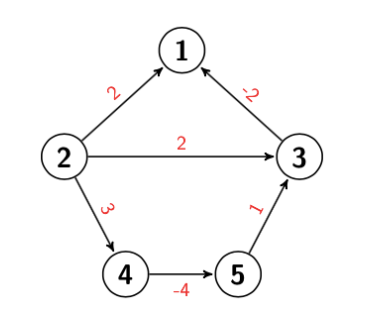

Para este ejemplo utilizaremos la siguiente tabla:

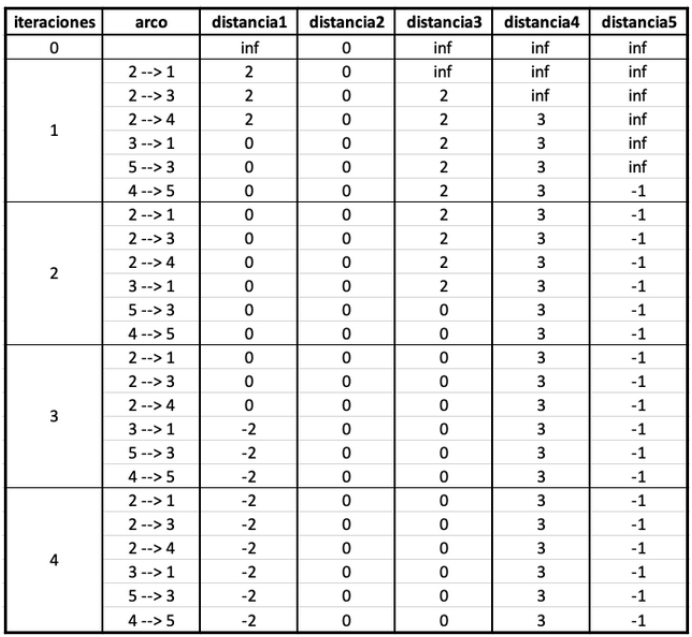

La tabla figura las iteraciones, los arcos que se consideran y las distancias que se van actualizando.

Se puede observar que el algortimo busca todos los caminos posibles, para buscar la distancia mínima.

La columna **distancia 1** que indica la distancia mínima que llevamos, al finalizar el algortimo nos da como resultado para la distancia mínima un valor de -2.



-----------------------------

DIJKSTRA

Considere el siguiente grafo:

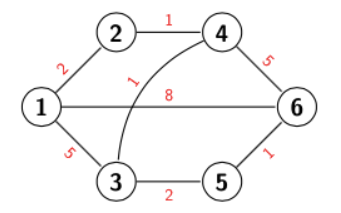

Nodo de origen: 1

El nodo de origen tiene tres aristas conectadas, vamos a elegir la de menor distancia, es decir, la de arista con valor 2.

Distancia mínima: 2

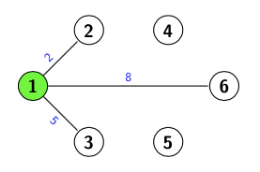

Ya tenemos dos nodos conectados, el 1 y el 2.

Ahora tomamos el nodo 2 y como solo tiene una arista conectada, tomamos esa y la conectamos.

Distancia mínima: 3



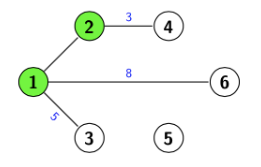

Ya tenemos tres nodos conectados, el 1, 2 y 4.

El nodo 4 tiene 2 aristas conectadas, elegimos la de menor distancia y la conectamos.

Distancia mínima: 4

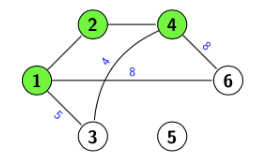

Ya tenemos cuatro nodos conectados, el 1, 2, 4 y el 3.

El nodo 3 tiene 2 aristas conectadas la de valor 5 y 2, elegimos la de menor distancia y la conectamos.

La arista de valor 5 se elimina, ya que forma un ciclo.

Distancia mínima: 6

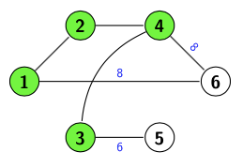

Ya tenemos cinco nodos conectados, el 1, 2, 4, 3 y el 5.

Se repite el proceso con el nodo 5. Solo tiene una arista conectada.

La conectamos con el nodo 6. 

En este punto todos los nodos están conectados.

Distancia mínima: 7
 


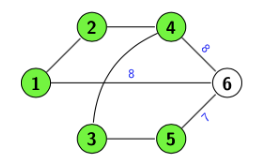

Entonces obtenemos el grafo:

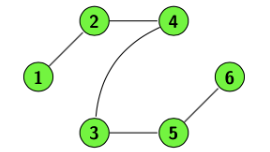

Con distancia mínima **7**

**RECORDAR**: El algortimo puede generar cualquier otro tipo de árbol para conseguir la distancia mínima.

--------------------------------------
3- **IMPLEMENTACIÓN DEL ALGORITMO**

Generador de instancias


In [12]:
import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100))
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) 
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [2]:
import networkx as nx

def graph_to_nxdigraph(graph: list, n: int):

    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph


In [50]:
import networkx as nx
import matplotlib.pyplot as plt

def mostrarGrafo(A, r):
      T = graph_to_nxdigraph(A,r)
      pos=nx.spring_layout(T,r*2)
      labels = nx.get_edge_attributes(T,'weight')
      nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)
      nx.draw(T,pos, node_color="pink", with_labels=True, node_size=800, font_color="white", font_size=14, font_weight="black", width=2.0, edge_color ="black")

BELLMAN-FORD

In [74]:
from re import A
from matplotlib.rcsetup import validate_aspect
from traitlets.config.configurable import validate
import matplotlib.pyplot as plt

def bellmanFord(a,v,n,s,verbose):

  L = [float("inf")] * v                                                       
  L[s] = 0
  flag = False

  if verbose:
    print(f"Grafo de {v} nodos")
    print(" ")

  for i in range(v - 1):                                                          
    for j in range(n):                                                          
      if L[a[j][0]] + a[j][2] < L[a[j][1]]:
        if verbose:
          print(f"Calculamos {L[a[j][0]]} + {a[j][2]} = {L[a[j][0]] + a[j][2]}")
          print(f"Comprobamos {L[a[j][0]] + a[j][2]} < {L[a[j][1]]}")
          print("La distancia se actualiza")
          print(" ")
        L[a[j][1]] = L[a[j][0]] + a[j][2]

  for i in range(n):                                                             
    x = a[i][0]
    y = a[i][1]
    aux = a[i][2]
    if L[x] != float("inf") and L[x] + aux < L[y]:                              
      print("Se encontró un ciclo negativo")
      flag = True

  if verbose == True and flag == False:
    print("No se encontró un ciclo negativo")
      
  return L


Grafo de 4 nodos
 
Calculamos 0 + 47 = 47
Comprobamos 47 < inf
La distancia se actualiza
 
Calculamos 47 + 28 = 75
Comprobamos 75 < inf
La distancia se actualiza
 
Calculamos 75 + 84 = 159
Comprobamos 159 < inf
La distancia se actualiza
 
Calculamos 75 + 59 = 134
Comprobamos 134 < 159
La distancia se actualiza
 
No se encontró un ciclo negativo
Distancia mínima: 0
Distancia mínima: 75
Distancia mínima: 47
Distancia mínima: 134


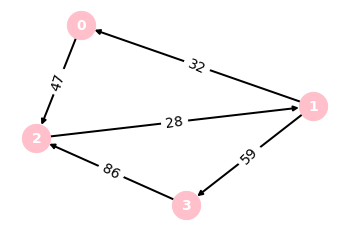

In [75]:
grafo,s = instance_generator(4)
mostrarGrafo(grafo,4)
n = len(grafo)
a = bellmanFord(grafo,4,n,s,True)

for i in range(4):
    print(f"Distancia mínima: {a[i]}")

DIJKSTRA

Generador de instancias

In [40]:
def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator_dijkstra(n: int):                                        
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))
        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) 
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) 
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

In [37]:
def matrix(grafo, V):
    edges = len(grafo)                                                          
    G = [[0 for i in range(V)] for j in range(V)]

    for node in range(edges):
        for (x, y, peso) in grafo:
            G[x][y] = peso
    return G

In [80]:
def dijkstra(grafo, V ,s,verbose):
  dist = [float("inf")] * V                                                     
  dist[s] = 0                                                                   
  visitado = [False] * V
 
  for cout in range(V):

    min = float("inf")
    min_index = 0

    for u in range(V):
      if dist[u] < min and visitado[u] == False:                               
        if verbose:
          print(f"\nComparamos {dist[u]} > {min}")
          print(f"La distancia se actualiza")
        min = dist[u]
        min_index = u
    x = min_index

    if verbose:
      print(f"Nodo: {x} ")
      print(f"Distancia más corta: {dist[x]}")

    visitado[x] = True

    for y in range(V):
      if grafo[x][y] > 0 and visitado[y] == False and dist[y] > dist[x] + grafo[x][y]:
        if verbose:
          print(f"Calculamos {dist[x]} + {grafo[x][y]} = {dist[x] + grafo[x][y]}")
          print(f"Verificar si {dist[y]} < {dist[x] + grafo[x][y]} para encontrar otra distancia menor")
        dist[y] = dist[x] + grafo[x][y]
    

  return dist


Comparamos 0 > inf
La distancia se actualiza
Nodo: 0 
Distancia más corta: 0
Calculamos 0 + 73 = 73
Verificar si inf < 73 para encontrar otra distancia menor
Calculamos 0 + 16 = 16
Verificar si inf < 16 para encontrar otra distancia menor

Comparamos 73 > inf
La distancia se actualiza

Comparamos 16 > 73
La distancia se actualiza
Nodo: 3 
Distancia más corta: 16

Comparamos 73 > inf
La distancia se actualiza
Nodo: 1 
Distancia más corta: 73
Nodo: 0 
Distancia más corta: 0
0 	 0
1 	 73
2 	 inf
3 	 16


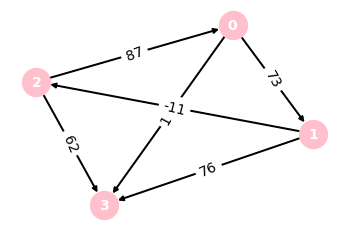

In [81]:
grafo,s = instance_generator_dijkstra(4)
mostrarGrafo(grafo,4)
grafo = matrix(grafo,4)
a = dijkstra(grafo,4,s,True)

for node in range(4):
  print(node, "\t", a[node])

--------------------------------------------


**4- PROPIEDADES DEL ALGORITMO**

CORRECTITUD BELLMAN-FORD

**Teorema:**

El algortimo retorna correctamente la distancia menor de un nodo inicial al resto de los nodos del grafo G, solo si el grafo no contiene ciclos negativos.

**Prueba del teorema:**

Para la i-ésima iteración: d = distancia, n = nodo.

Caso base: 

Cuando i = 0, la distancia para el nodo se iguala a 0 (d = 0).

Por inducción:

Al principio de la iteración i + 1 , se sabe que la distancia actualizada es el camino más corto al nodo pasando por i aristas.

Un nodo(n) y un nodo(s) que le sigue y su arista correspodiente (n,s) forman una nueva ruta con k + 1 arista. 

Por inducción se sabe que la distancia para cada nodo n se calcula de forma óptima y al sumar la distancia de la arista que une (n,s) se obtiene la distancia hasta s. 

Sin embargo podrian ocurrir dos casos, cuando la ruta más corta esta formado por i aristas o menos y cuando la ruta más corta esta formado por i aristas más una arista. En el primer caso se mantiene el valor obtenido en la iteración anterior. En el segundo caso, al finalizar la iteración ya tendremos calculado un nuevo valor para la distancia.

---------------------

TIEMPO DE EJECUCIÓN 

**BELLMAN-FORD**

**Teorema**

Tiempo de ejecución:

Caso promedio: O(V * E)

Peor caso: O(V^3)

Mejor caso: O(E)

**Prueba del teorema**

- Caso promedio:

Inicializar la distancia para cada nodo del grafo tiene un tiempo de ejecución O(V). Ejecutar V - 1 iteraciónes pasando por todas las aristas del grafo tiene un tiempo de ejecución O(V * E). Para verificar si hay ciclos negativos tiene un tiempo de ejecución O(E).

Si sumamos todo nos da O(V * E)

- Peor caso:

Ocurre cuando en la primera iteración ya se calculó el camino más corto, pero el algortimo no se detiene y sigue calculando.
Tiempo de ejecución O(V^2) cuando se calculo en las primeras iteraciones la distancia más corta.

- Mejor caso:

Sucede cuando los nodos toman un camino lineal, es decir, el grafo se recorre de izquierda a derecha, de manera que la distancia siempre se va a calcular correctamente y de forma inmediata.



**DIJKSTRA**

**Teorema**

Tiempo de ejecución: O(E log V)

**Prueba del teorema**

Al insertar los nodos por prioridad se tiene un tiempo de ejecución O(V log V). Al obtener y eliminar uno por uno las distancias menores se tiene un tiempo de ejecución de O(V log V). Al obtener los nodos que siguen de cada nodo del grafo y pasarf por todas las aristas. Se debe calcular la distancia de todos los nodos siguientes e insertarlos, esto da un tiempo de ejecución O(E log V).

Al sumar los tiempos, nos da O(E log V).

----------------
5- EXPERIMENTOS Y ANÁLISIS



Tiempo de ejecución teórico

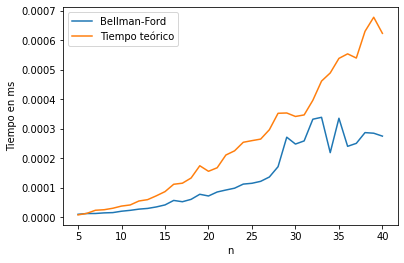

In [87]:
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; z=[]


for n in range(5,41):
  
  a, b = instance_generator(n)
  
  t1 = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({a},{n},{len(a)},{b},{False})", repeat=25, number=10)
  
  media = 0
  media = t1[0]/25
  x.append(n)
  y.append(media)
  z.append(n*len(a)/5000000)

plt.plot(x, y)
plt.plot(x,z)

plt.legend([ "Bellman-Ford", "Tiempo teórico"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis del gráfico**

Como se puede ver en el gráfico, los tiempos de ejecución se asemejan. Tienen una gráfica muy parecida.

Comparación algortimo Bellman-Ford y Dijkstra

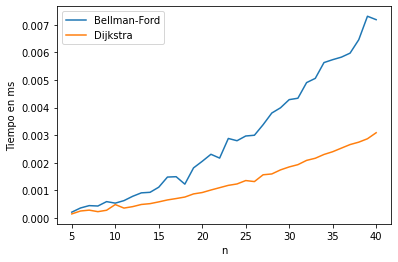

In [85]:
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]; z=[]


for n in range(5,41):
  
  a, b = instance_generator(n)
  c = matrix(a,n)
  
  t1 = repeat(setup="from __main__ import bellmanFord", stmt=f"bellmanFord({a},{n},{len(a)},{b},{False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dijkstra", stmt=f"dijkstra({c},{n},{b},{False})", repeat=1, number=10)
  
  x.append(n)
  y.append(t1)
  z.append(t2)


plt.plot(x, y)
plt.plot(x,z)
plt.legend([ "Bellman-Ford","Dijkstra"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**Análisis del gráfico**

Como se puede observar, el algoritmo Dijkstra es más rápido, esto sucede ya que el tiempo de ejecución del algortimo es menor al de Bellman-Ford.